In [1]:
# This data was extracted from the census bureau database found at
# | http://www.census.gov/ftp/pub/DES/www/welcome.html
# | Donor: Ronny Kohavi and Barry Becker,
# |        Data Mining and Visualization
# |        Silicon Graphics.
# |        e-mail: ronnyk@sgi.com for questions.
# | Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).
# | 48842 instances, mix of continuous and discrete    (train=32561, test=16281)
# | 45222 if instances with unknown values are removed (train=30162, test=15060)
# | Duplicate or conflicting instances : 6
# | Class probabilities for adult.all file
# | Probability for the label '>50K'  : 23.93% / 24.78% (without unknowns)
# | Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)
# |
# | Extraction was done by Barry Becker from the 1994 Census database.  A set of
# |   reasonably clean records was extracted using the following conditions:
# |   ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))
# |
# | Prediction task is to determine whether a person makes over 50K
# | a year.
# |
# | First cited in:
# | @inproceedings{kohavi-nbtree,
# |    author={Ron Kohavi},
# |    title={Scaling Up the Accuracy of Naive-Bayes Classifiers: a
# |           Decision-Tree Hybrid},
# |    booktitle={Proceedings of the Second International Conference on
# |               Knowledge Discovery and Data Mining},
# |    year = 1996,
# |    pages={to appear}}
# |
# | Error Accuracy reported as follows, after removal of unknowns from
# |    train/test sets):
# |    C4.5       : 84.46+-0.30
# |    Naive-Bayes: 83.88+-0.30
# |    NBTree     : 85.90+-0.28
# |
# |
# | Following algorithms were later run with the following error rates,
# |    all after removal of unknowns and using the original train/test split.
# |    All these numbers are straight runs using MLC++ with default values.
# |
# |    Algorithm               Error
# | -- ----------------        -----
# | 1  C4.5                    15.54
# | 2  C4.5-auto               14.46
# | 3  C4.5 rules              14.94
# | 4  Voted ID3 (0.6)         15.64
# | 5  Voted ID3 (0.8)         16.47
# | 6  T2                      16.84
# | 7  1R                      19.54
# | 8  NBTree                  14.10
# | 9  CN2                     16.00
# | 10 HOODG                   14.82
# | 11 FSS Naive Bayes         14.05
# | 12 IDTM (Decision table)   14.46
# | 13 Naive-Bayes             16.12
# | 14 Nearest-neighbor (1)    21.42
# | 15 Nearest-neighbor (3)    20.35
# | 16 OC1                     15.04
# | 17 Pebls                   Crashed.  Unknown why (bounds WERE increased)
# |
# | Conversion of original data as follows:
# | 1. Discretized agrossincome into two ranges with threshold 50,000.
# | 2. Convert U.S. to US to avoid periods.
# | 3. Convert Unknown to "?"
# | 4. Run MLC++ GenCVFiles to generate data,test.
# |
# | Description of fnlwgt (final weight)
# |
# | The weights on the CPS files are controlled to independent estimates of the
# | civilian noninstitutional population of the US.  These are prepared monthly
# | for us by Population Division here at the Census Bureau.  We use 3 sets of
# | controls.
# |  These are:
# |          1.  A single cell estimate of the population 16+ for each state.
# |          2.  Controls for Hispanic Origin by age and sex.
# |          3.  Controls by Race, age and sex.
# |
# | We use all three sets of controls in our weighting program and "rake" through
# | them 6 times so that by the end we come back to all the controls we used.
# |
# | The term estimate refers to population totals derived from CPS by creating
# | "weighted tallies" of any specified socio-economic characteristics of the
# | population.
# |
# | People with similar demographic characteristics should have
# | similar weights.  There is one important caveat to remember
# | about this statement.  That is that since the CPS sample is
# | actually a collection of 51 state samples, each with its own
# | probability of selection, the statement only applies within
# | state.


# >50K, <=50K.

# age: continuous.
# workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
# fnlwgt: continuous.
# education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
# education-num: continuous.
# marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
# occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
# relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
# race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
# sex: Female, Male.
# capital-gain: continuous.
# capital-loss: continuous.
# hours-per-week: continuous.
# native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.


In [2]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set(rc={"figure.figsize":(15,6)})
pd.pandas.set_option("display.max_columns",None)

In [3]:
data = pd.read_csv("adult.data",)

In [4]:
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
data.shape

(32561, 15)

In [7]:
# Check null values
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [8]:
# check duplicet value in data set
data.duplicated().sum()

24

In [9]:
# drop duplicate value from data
data.drop_duplicates(inplace=True)

In [10]:
data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
# saprate catigorical and numerical features
catigorical_features = data.select_dtypes(include="object").columns
numerical_features = data.select_dtypes(exclude="object").columns
print(catigorical_features)
print(numerical_features)

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')
Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')


In [12]:
# fetch the unique value from catigorical data
for i in catigorical_features:
    print(i,data[i].unique())
    print("*"*80)

workclass [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
********************************************************************************
education [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
********************************************************************************
marital_status [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
********************************************************************************
occupation [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
*****************

In [13]:
# remove ? and replace with mode value
data["workclass"] = data["workclass"].replace(" ?"," Private")
data["occupation"] = data["occupation"].replace(" ?"," Prof-specialty")
data["native_country"] = data["native_country"].replace(" ?"," United-States")

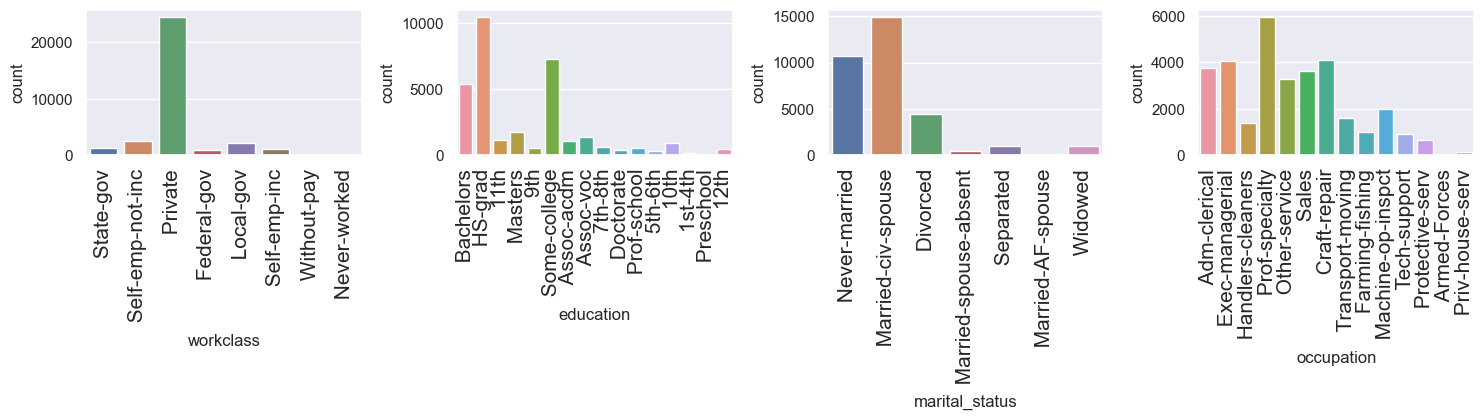

In [14]:
cato1 = ['workclass', 'education', 'marital_status', 'occupation']
try:
    for i in range(0,len(cato1)):
        plt.subplot(2,4,i+1)
        sns.countplot(x=data[cato1[i]])
        plt.xticks(size=15,rotation=90)
        plt.tight_layout()
except Exception as e:
    print(e)
            

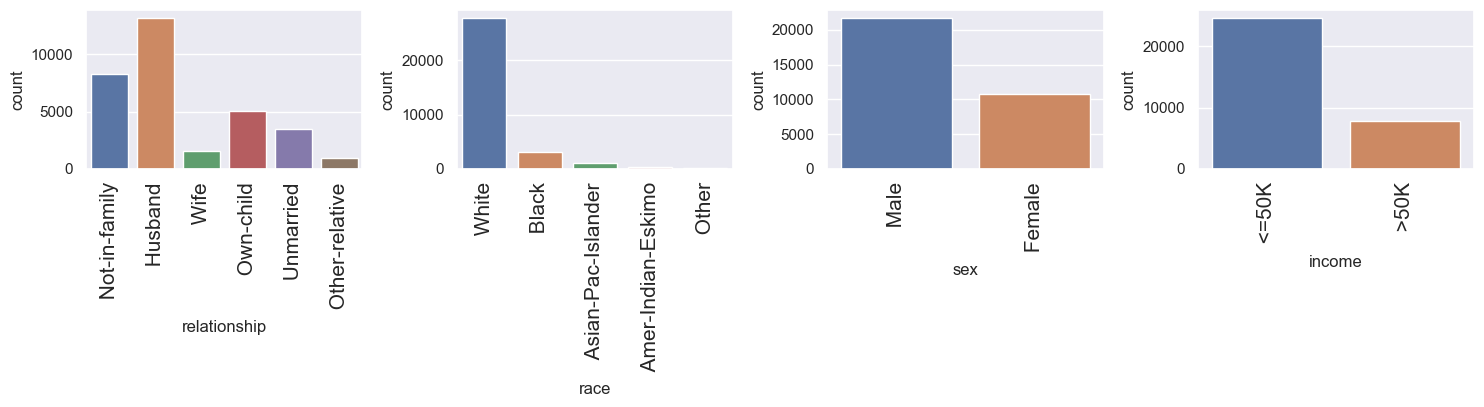

In [15]:
cato2 = ['relationship', 'race', 'sex', 'income']
try:
    for i in range(0,len(cato2)):
        plt.subplot(2,4,i+1)
        sns.countplot(x=data[cato2[i]])
        plt.xticks(size=15,rotation=90)
        plt.tight_layout()
except Exception as e:
    print(e)

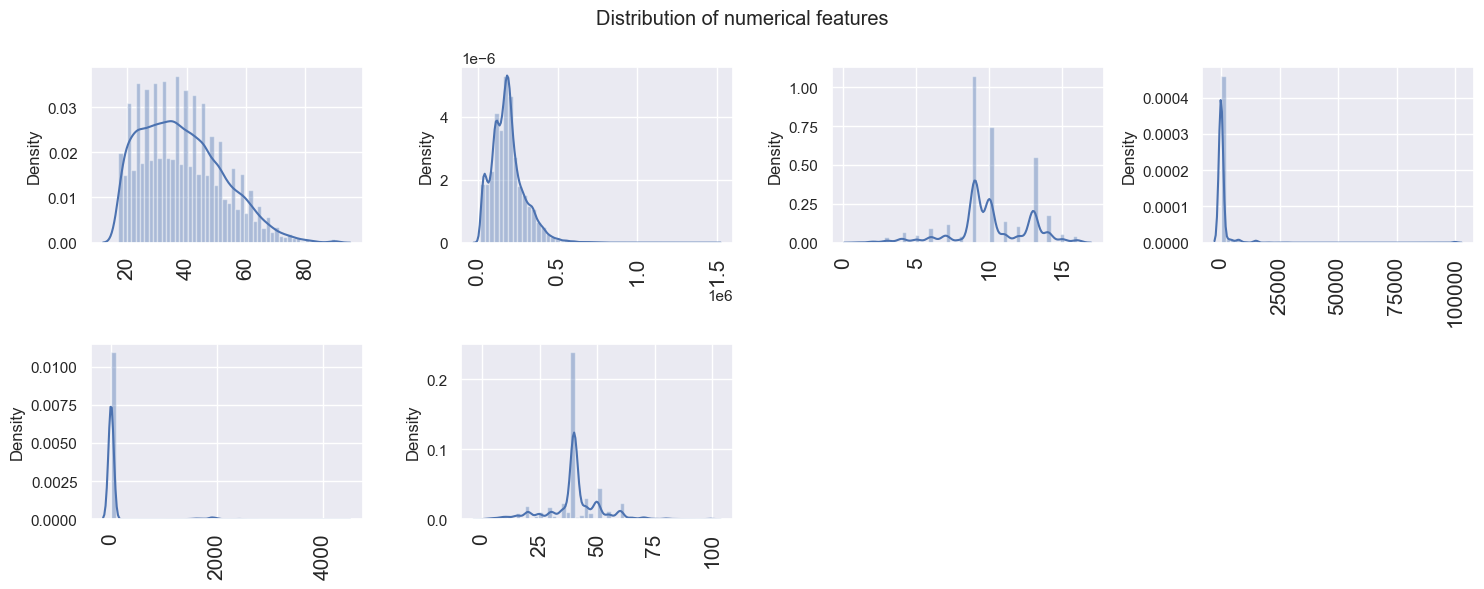

In [16]:
try:
    plt.suptitle("Distribution of numerical features")
    for i in range(0,len(numerical_features)):
        plt.subplot(2,4,i+1)
        sns.distplot(x=data[numerical_features[i]])
        plt.xticks(size=15,rotation=90)
        plt.tight_layout()
except Exception as e:
    print(e)

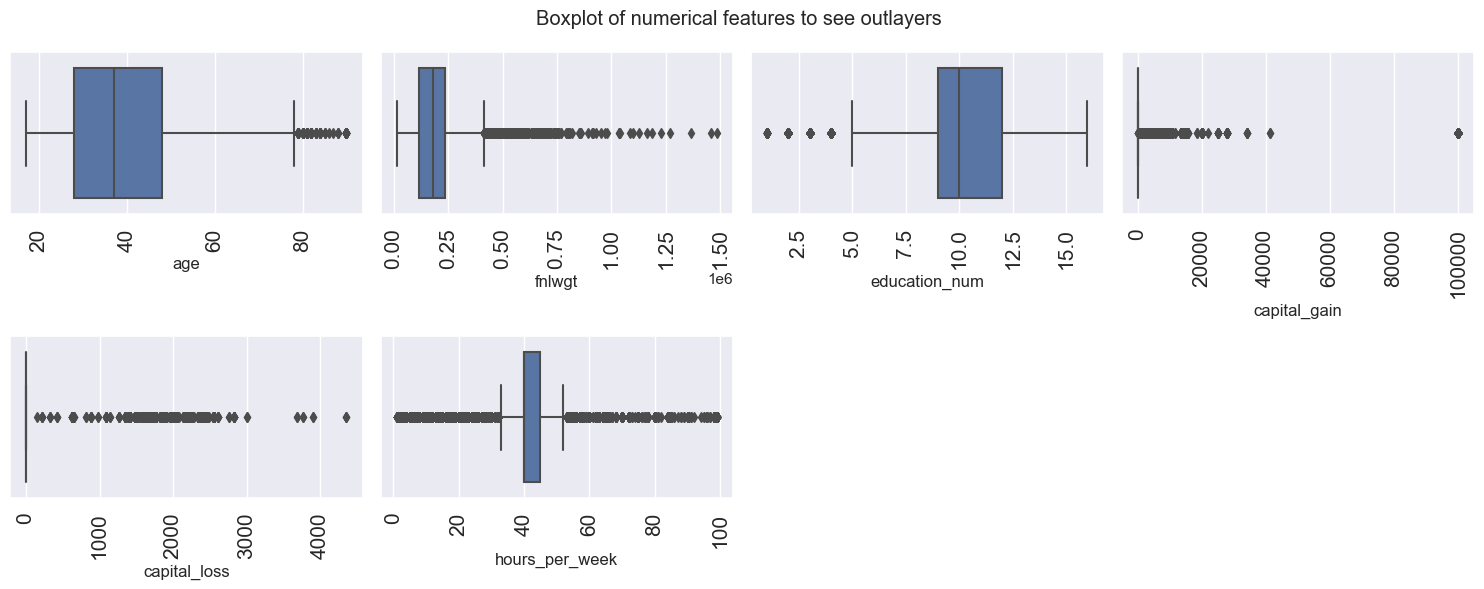

In [17]:
try:
    plt.suptitle("Boxplot of numerical features to see outlayers ")
    for i in range(0,len(numerical_features)):
        plt.subplot(2,4,i+1)
        sns.boxplot(x=data[numerical_features[i]])
        plt.xticks(size=15,rotation=90)
        plt.tight_layout()
except Exception as e:
    print(e)

<AxesSubplot:xlabel='income'>

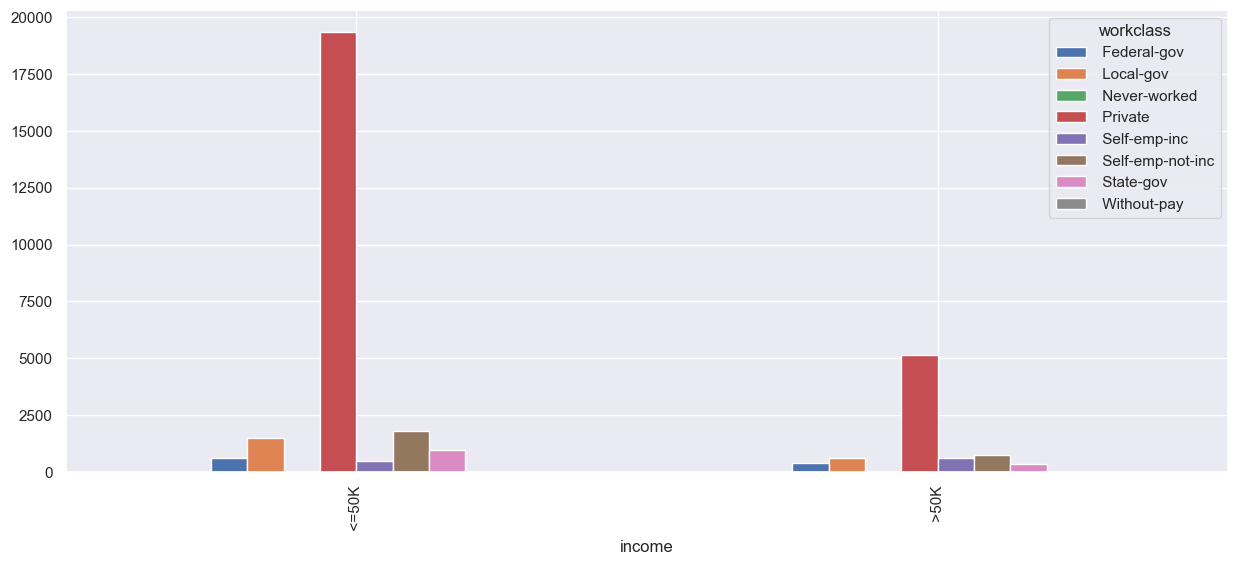

In [18]:
class_salary = pd.crosstab(data['income'],data['workclass'])
class_salary.plot(kind='bar')

<AxesSubplot:xlabel='income'>

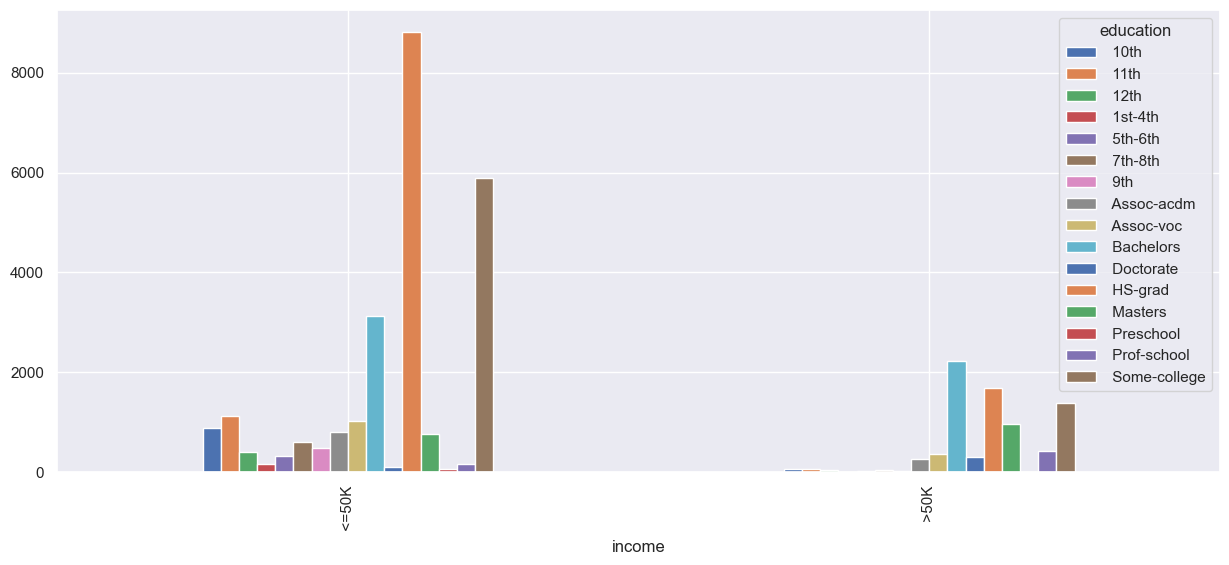

In [19]:
education = pd.crosstab(data['income'],data['education'])
education.plot(kind="bar")

<AxesSubplot:xlabel='income'>

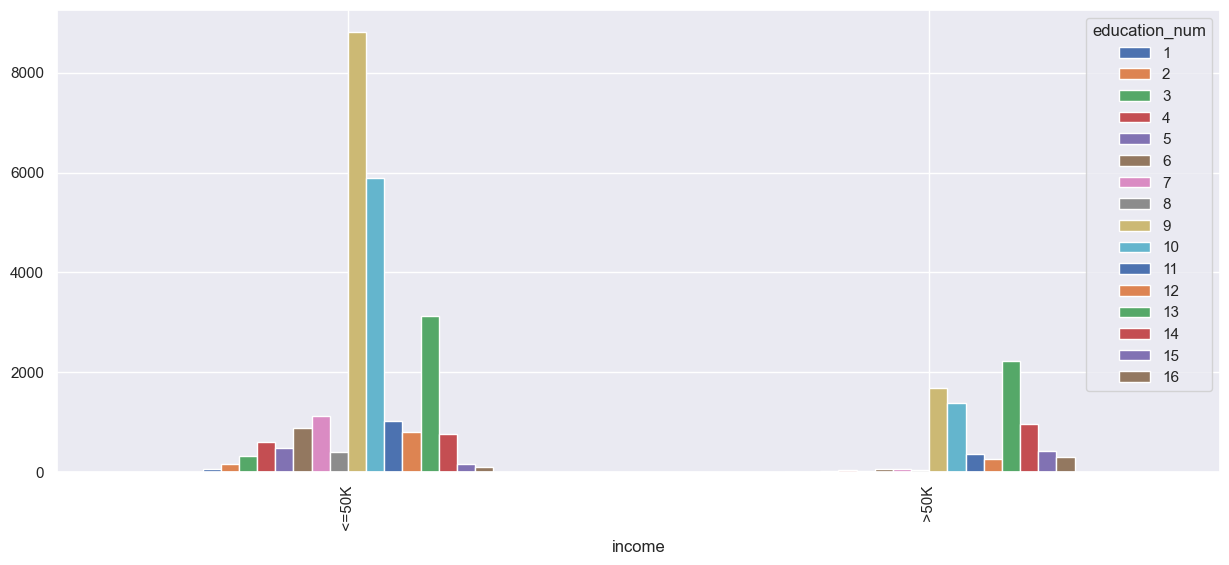

In [20]:
education_num = pd.crosstab(data['income'],data['education_num'])
education_num.plot(kind="bar")

<AxesSubplot:xlabel='income'>

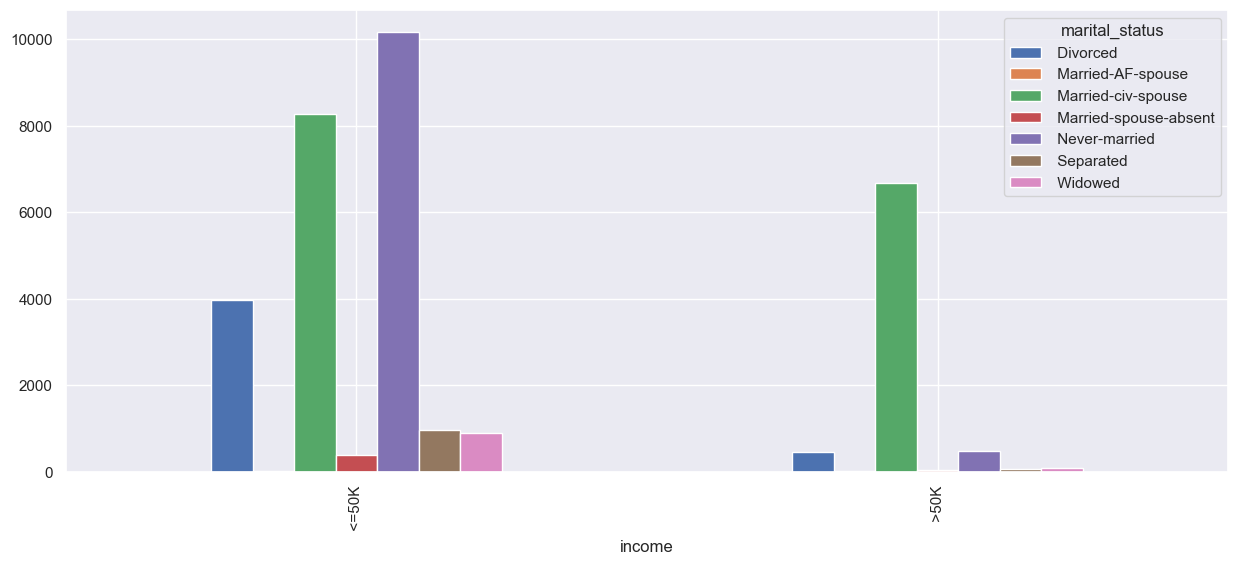

In [21]:
marital_status = pd.crosstab(data['income'],data['marital_status'])
marital_status.plot(kind="bar")

<AxesSubplot:xlabel='income'>

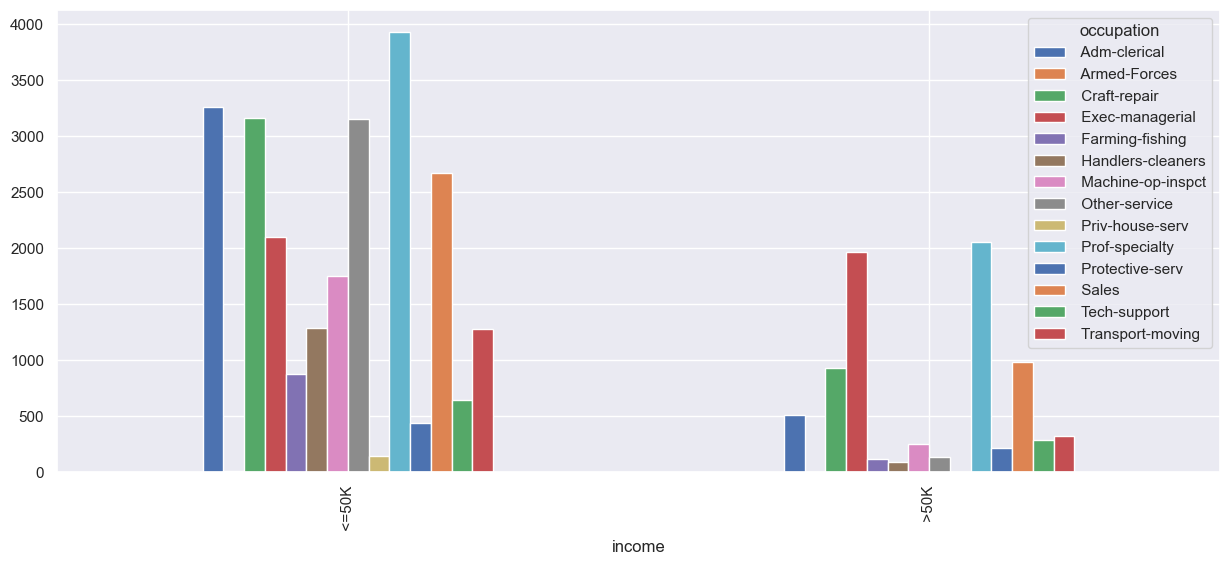

In [22]:
occupation = pd.crosstab(data['income'],data['occupation'])
occupation.plot(kind="bar")

<AxesSubplot:xlabel='income'>

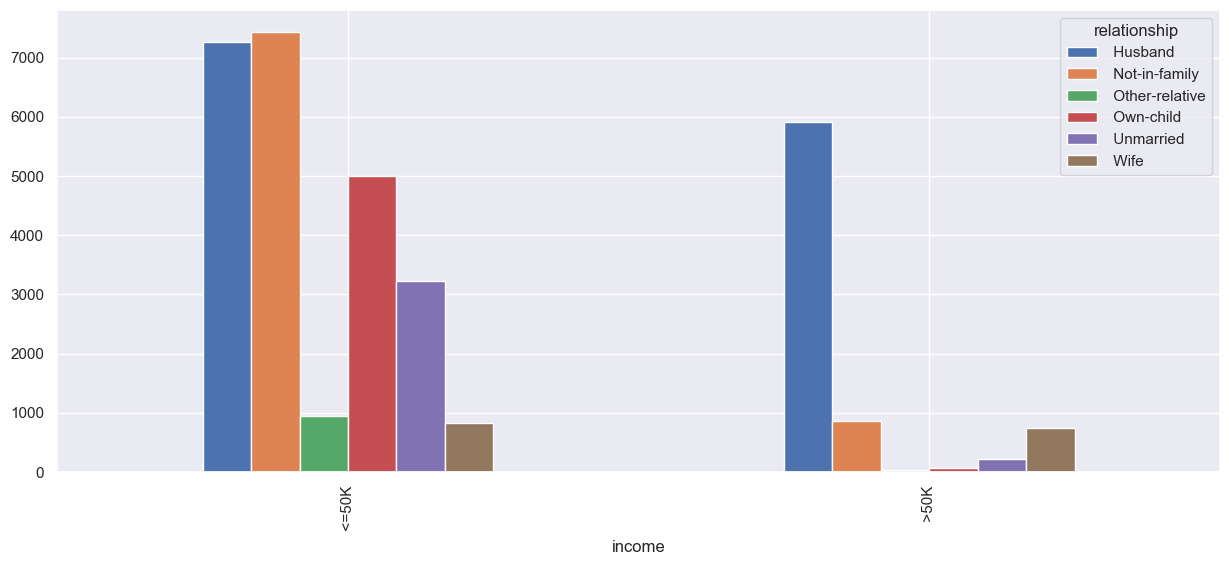

In [23]:
relationship = pd.crosstab(data['income'],data['relationship'])
relationship.plot(kind="bar")

<AxesSubplot:xlabel='income'>

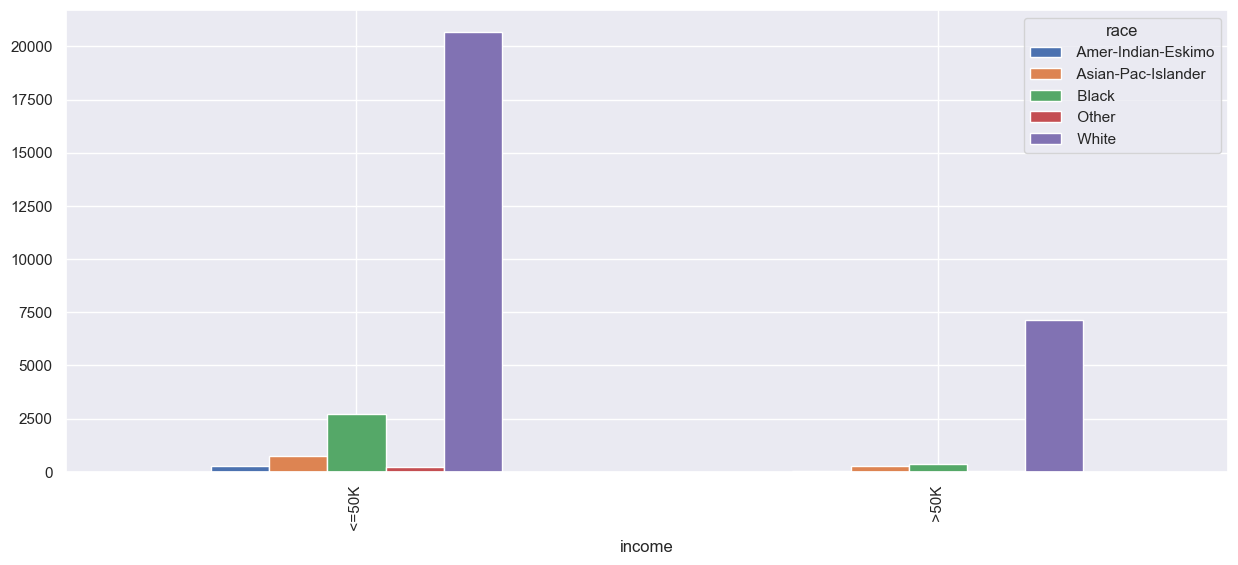

In [24]:
race = pd.crosstab(data['income'],data['race'])
race.plot(kind="bar")

<AxesSubplot:xlabel='income'>

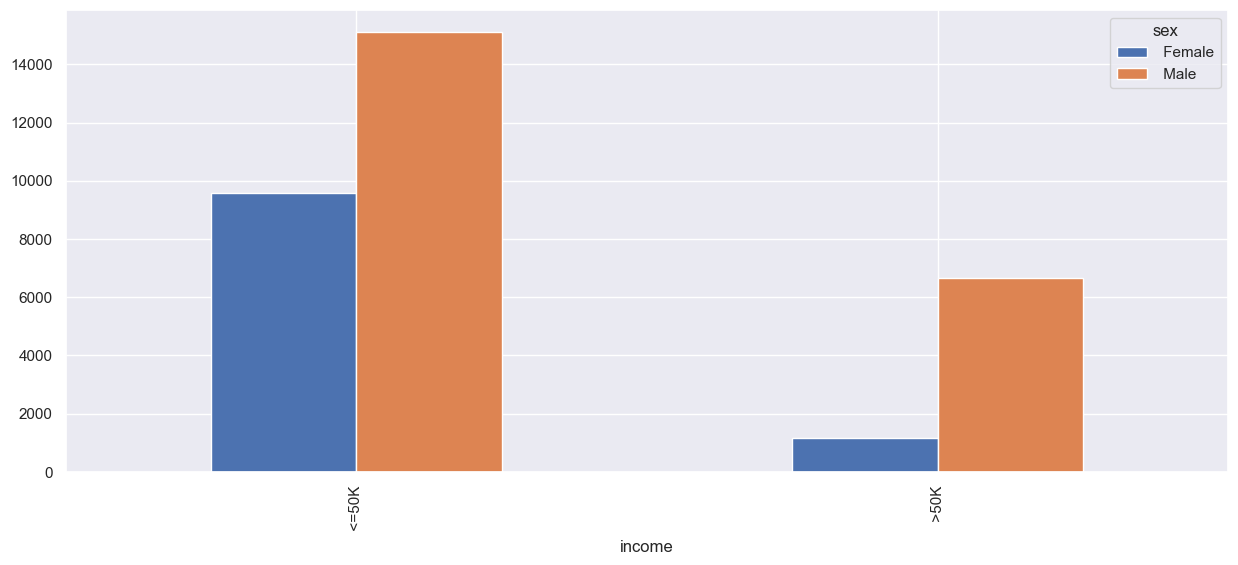

In [25]:
sex = pd.crosstab(data['income'],data['sex'])
sex.plot(kind="bar")

In [26]:
catigorical_features

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')

In [27]:
from sklearn.preprocessing import LabelEncoder

# create a LabelEncoder object
le = LabelEncoder()

# define the categorical features
categorical_features =['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country']

# loop through the categorical features and encode them
for feature in categorical_features:
    le.fit(data[feature])
    data[feature] = le.transform(data[feature])

In [28]:
data["income"] = data["income"].map({' <=50K':0, ' >50K':1})

<AxesSubplot:>

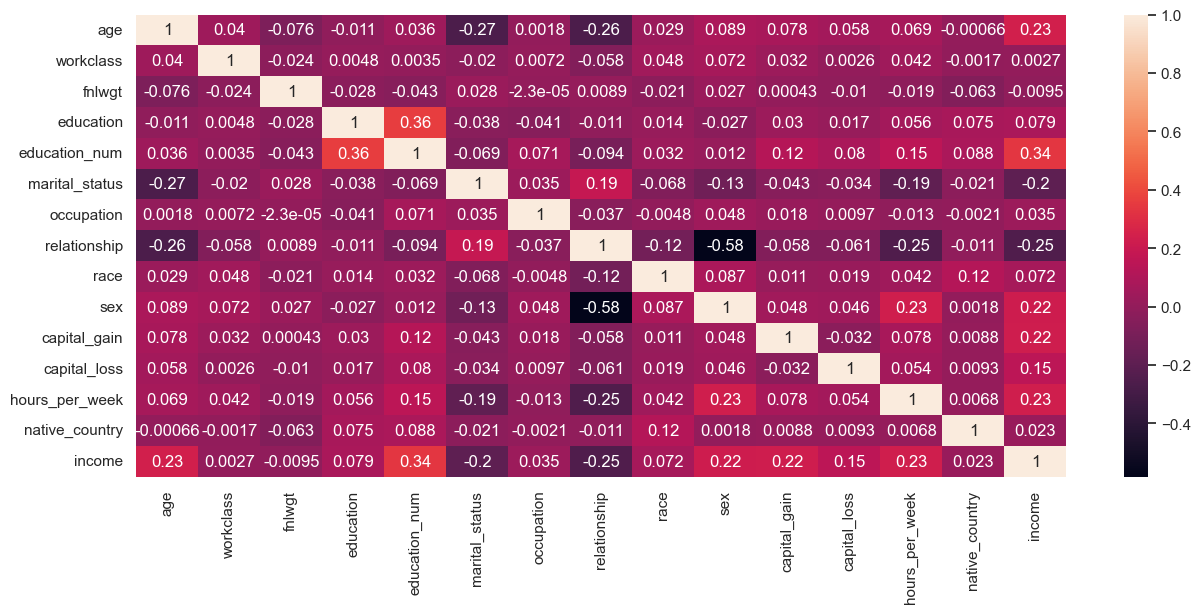

In [29]:
sns.heatmap(data.corr(),annot=True)

In [31]:

# # using one hot encoding and label encoding  on some catigorical data
# data["workclass"] = data["workclass"].map({' State-gov': 8,
#                     ' Self-emp-not-inc': 7,
#                     ' Private': 6,
#                     ' Federal-gov': 5,
#                     ' Local-gov': 4,
#                     ' Self-emp-inc': 3,
#                     ' Without-pay': 2,
#                     ' Never-worked': 1})

# data["education"] = data["education"].map({
#     ' Preschool': 1,
#     ' 1st-4th': 2,
#     ' 5th-6th': 3,
#     ' 7th-8th': 4,
#     ' 9th': 5,
#     ' 10th': 6,
#     ' 11th': 7,
#     ' 12th': 8,
#     ' HS-grad': 9,
#     ' Some-college': 10,
#     ' Assoc-voc': 11,
#     ' Assoc-acdm': 12,
#     ' Bachelors': 13,
#     ' Masters': 14,
#     ' Prof-school': 15,
#     ' Doctorate': 16
# })

# data["occupation"] = data["occupation"].map({' Adm-clerical': 4,
#              ' Exec-managerial': 1,
#              ' Handlers-cleaners': 8,
#              ' Prof-specialty': 2,
#              ' Other-service': 5,
#              ' Sales': 3,
#              ' Craft-repair': 12,
#              ' Transport-moving': 7,
#              ' Farming-fishing': 9,
#              ' Machine-op-inspct': 6,
#              ' Tech-support': 10,
#              ' Protective-serv': 11,
#              ' Armed-Forces': 14,
#              ' Priv-house-serv': 13})

In [32]:
# droping education_num column because we have education ordinal encorded one
data.drop(["education","fnlwgt"],axis=1,inplace=True)

In [33]:
# # male: 1 and female:0
# data["sex"] = data["sex"].map({' Male':1, ' Female':0})

In [34]:
# # using onehot encoding on this feature normal 
# maritalstatus = pd.get_dummies(data["marital_status"],prefix="marital_status",drop_first=True)
# relationship = pd.get_dummies(data["relationship"],prefix="relationship",drop_first=True)
# race = pd.get_dummies(data["race"],prefix="race",drop_first=True)
# native_country = pd.get_dummies(data["native_country"],prefix="native_country",drop_first=True)

In [35]:
# # drop all unwanted colums
# data.drop(["marital_status","relationship","race","native_country"],axis=1,inplace=True)

In [36]:
# # concanet all dummy frame to main frame
# data = pd.concat([data,maritalstatus,relationship,race,native_country],axis=1)

## Model Traning

In [37]:
data.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,6,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,13,2,3,0,4,1,0,0,13,38,0
2,38,3,9,0,5,1,4,1,0,0,40,38,0
3,53,3,7,2,5,0,2,1,0,0,40,38,0
4,28,3,13,2,9,5,2,0,0,0,40,4,0


In [38]:
data.to_csv("income_cleandata.csv",index=False)

In [39]:
data.shape

(32537, 13)

In [40]:
# Saprate dependent and indipendent features
x = data.drop("income",axis=1)
y = data["income"]

In [41]:
catigorical_features = x.select_dtypes(include="object").columns
numerical_features = x.select_dtypes(exclude="object").columns
print(catigorical_features)
print(numerical_features)

Index([], dtype='object')
Index(['age', 'workclass', 'education_num', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
       'hours_per_week', 'native_country'],
      dtype='object')


In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
#pipline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [43]:
num_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
    ]

)

cato_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("scaler",StandardScaler())
    ]

)

preprocessor = ColumnTransformer([
    ("num_pipline",num_pipline,numerical_features)
])


In [44]:
# Train test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [45]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(26029, 12)
(6508, 12)
(26029,)
(6508,)


In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,classification_report,ConfusionMatrixDisplay

In [47]:
def performance_metrices(test,predict):
    confusionmetrix = print(f"CONFUSION_METRIX: {confusion_matrix(test,predict)}")
    pre = print(f"PRECISION_SCORE: {precision_score(test,predict)}")
    recall = print(f"RECALL_SCORE: {recall_score(test,predict)}")
    f1score = print(f"F1_SCORE: {f1_score(test,predict)}")
    accuracyscore = print(f"ACCURACY_SCORE: {accuracy_score(test,predict)}")
    return confusionmetrix,pre,recall,f1score,accuracyscore
    

In [48]:
logastic = LogisticRegression()

In [49]:
logastic.fit(X_train,y_train)

LogisticRegression()

In [50]:
logastic.score(X_train,y_train)

0.8062929809059126

In [51]:
y_pread = logastic.predict(X_test)

In [52]:
performance_metrices(y_test,y_pread)

CONFUSION_METRIX: [[4637  268]
 [ 973  630]]
PRECISION_SCORE: 0.7015590200445434
RECALL_SCORE: 0.3930131004366812
F1_SCORE: 0.5037984806077568
ACCURACY_SCORE: 0.8093116164720344


(None, None, None, None, None)

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
forest = RandomForestClassifier()

In [55]:
forest.fit(X_train,y_train)

RandomForestClassifier()

In [56]:
forest.score(X_train,y_train)

0.9782934419301548

In [57]:
y_pread = forest.predict(X_test)

In [58]:
performance_metrices(y_test,y_pread)

CONFUSION_METRIX: [[4527  378]
 [ 594 1009]]
PRECISION_SCORE: 0.7274693583273252
RECALL_SCORE: 0.6294447910168434
F1_SCORE: 0.6749163879598662
ACCURACY_SCORE: 0.8506453595574678


(None, None, None, None, None)

In [59]:
tree = DecisionTreeClassifier()

In [60]:
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [61]:
tree.score(X_train,y_train)

0.9782934419301548

In [62]:
y_pread = tree.predict(X_test)

In [63]:
performance_metrices(y_test,y_pread)

CONFUSION_METRIX: [[4312  593]
 [ 619  984]]
PRECISION_SCORE: 0.6239695624603678
RECALL_SCORE: 0.6138490330630069
F1_SCORE: 0.6188679245283019
ACCURACY_SCORE: 0.8137676705593117


(None, None, None, None, None)

## Use Hyperparemetertuning

In [64]:
logestic1 = LogisticRegression()

In [65]:
pram = {
    "class_weight":["balanced"],
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
    
}

In [66]:
grid = GridSearchCV(estimator=logestic1,param_grid=pram,cv=5,n_jobs=-1, verbose=3)

In [67]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced'], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             verbose=3)

In [68]:
grid.best_params_

{'C': 0.001, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'saga'}

In [69]:
grid.score(X_train,y_train)

0.7808213915248376

In [70]:
y_prad = grid.predict(X_test)

In [71]:
accuracy_score(y_test,y_prad)

0.7758143822987092

In [72]:
tree1 = DecisionTreeClassifier()

In [73]:
param_grid = {
    "class_weight":["balanced"],
    "criterion":['gini',"entropy","log_loss"],
    "splitter":['best','random'],
    "max_depth":[3,4,5,6],
    "min_samples_split":[2,3,4,5],
    "min_samples_leaf":[1,2,3],
    "max_features":["auto","sqrt","log2"]
}

In [74]:
grid_search = GridSearchCV(estimator=tree1,param_grid=param_grid,cv=5,scoring="accuracy")

In [75]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [76]:
grid_search.best_params_

{'class_weight': 'balanced',
 'criterion': 'log_loss',
 'max_depth': 6,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'splitter': 'best'}

In [77]:
grid_search.score(X_train,y_train)

0.7228475930692689

In [78]:
y_prad = grid_search.predict(X_test)

In [79]:
accuracy_score(y_test,y_prad)

0.7152735095267363

In [80]:
print(classification_report(y_test,y_prad))

              precision    recall  f1-score   support

           0       0.95      0.65      0.78      4905
           1       0.46      0.90      0.61      1603

    accuracy                           0.72      6508
   macro avg       0.71      0.78      0.69      6508
weighted avg       0.83      0.72      0.73      6508



In [81]:
forest1 = RandomForestClassifier()

In [82]:
param_grid = {
    "class_weight":["balanced"],
    'n_estimators': [20, 50, 30],
    'max_depth': [10, 8, 5],
    'min_samples_split': [2, 5, 10],
}

In [83]:
grid_search = GridSearchCV(estimator=forest1,param_grid=param_grid,cv=5,scoring="accuracy")

In [84]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced'], 'max_depth': [10, 8, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [20, 50, 30]},
             scoring='accuracy')

In [85]:
grid_search.best_params_

{'class_weight': 'balanced',
 'max_depth': 10,
 'min_samples_split': 5,
 'n_estimators': 30}

In [86]:
grid_search.score(X_train,y_train)

0.8254639056437051

In [87]:
y_prad = grid_search.predict(X_test)

In [88]:
accuracy_score(y_test,y_prad)

0.8111555009219422

In [89]:
print(classification_report(y_test,y_prad))

              precision    recall  f1-score   support

           0       0.95      0.79      0.86      4905
           1       0.58      0.87      0.69      1603

    accuracy                           0.81      6508
   macro avg       0.76      0.83      0.78      6508
weighted avg       0.86      0.81      0.82      6508



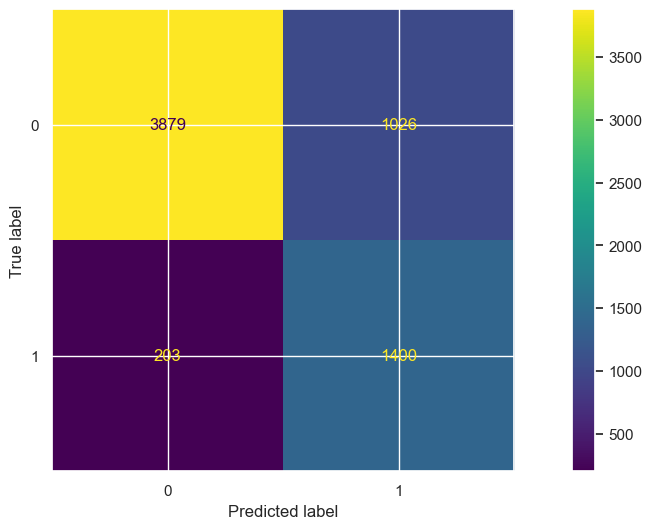

In [90]:
cm=confusion_matrix(y_test,y_prad)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [91]:
data

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,6,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,13,2,3,0,4,1,0,0,13,38,0
2,38,3,9,0,5,1,4,1,0,0,40,38,0
3,53,3,7,2,5,0,2,1,0,0,40,38,0
4,28,3,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,12,2,12,5,4,0,0,0,38,38,0
32557,40,3,9,2,6,0,4,1,0,0,40,38,1
32558,58,3,9,6,0,4,4,0,0,0,40,38,0
32559,22,3,9,4,0,3,4,1,0,0,20,38,0
